# Medical Image Segmentation: Random Walker

Please first check if matplotlib, skimage, and scipy packages are installed. The random walker algorithm is a very simple but powerful instrument for medical image segmentation. It can be used as it is or in combination with other segmentation methods. This exercise will train you to apply the random walker for the segmentation of 2D images.

Note that you are ALLOWED to use functions from scipy, skimage, matplotlib, and numpy Python packages.

During the execution of each subtask, you will program individual functions that can be used in the following subtasks.

# Exercise

The code below will download a 3D head-and-neck (HaN) computed tomography image and 2D cell image. The HaN image is accompanied by a mask with seed points labeling the mandible and a mask with seed points labeling the background. Similarly, the cell image is accompanied by a mask with seed points labeling individual cells and a mask with seed points labeling the background.

The code also shows how to visualize some cross-section of the HaN image.

Please be sure that you correctly specified the path to the data for this assignment.

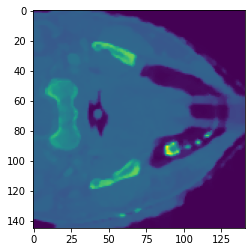

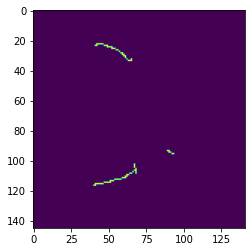

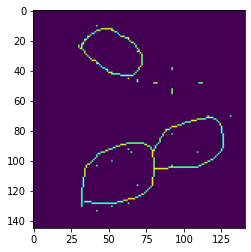

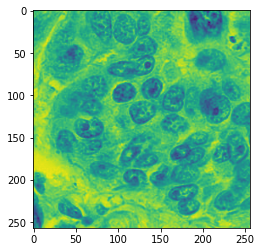

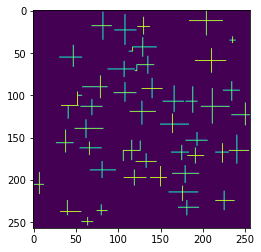

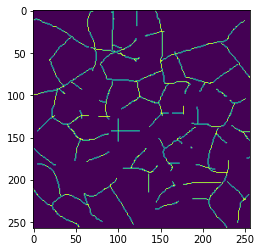

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# ADD NEEDED SUBMODULES
import skimage as skimage

# ADD NEEDED SUBMODULES
import scipy as scipy
%matplotlib inline 
folder = 'D:/MIA/handin2/data2/'

HaN_imageArray = np.load(folder + 'HaN_original.npy')
HaN_objectMask = np.load(folder + 'HaN_mandible.npy')
HaN_backgroundMask = np.load(folder + 'HaN_background.npy')

cell_imageArray = np.load(folder + 'cellOriginal.npy')
cell_objectMask = np.load(folder + 'cellObject.npy')
cell_backgroundMask = np.load(folder + 'cellBackground.npy')

plt.figure(1)
plt.imshow(HaN_imageArray[:, :, 47])
plt.figure(2)
plt.imshow(HaN_objectMask[:, :, 47])
plt.figure(3)
plt.imshow(HaN_backgroundMask[:, :, 47])

plt.figure(4)
plt.imshow(cell_imageArray)
plt.figure(5)
plt.imshow(cell_objectMask)
plt.figure(6)
plt.imshow(cell_backgroundMask)


# Random walker in 2D

Exercise 1.1. Implement the random walker algorithm for the segmentation of cells from the provided 2D image. It is important to note that cells need to be segmented as individual objects, i.e. each cell should have its own label. The connected seed points from "cellObject.npy" correspond to individual cells.

Exercise 1.2. Visualize borders of individual cells after performing segmentation. Hint: check morphological operations for an idea of how to visualize borders.

In [31]:
def find_neighbors(image,i,j,d):
  neighbors = []
  for r in range(1,d+1):
    neighbors = neighbors + [np.clip([i-r,j],0,image.shape[0]-1),np.clip([i+r,j],0,image.shape[0]-1),
                np.clip([i,j-r],0,image.shape[1]-1),np.clip([i,j+r],0,image.shape[1]-1)]
  return neighbors
def ccd(I,d):
  V = np.zeros_like(I)
  t = 0
  for i in range(I.shape[0]):
    for j in range(I.shape[1]):
      if (V[i,j]==0) & (I[i,j]==1):
        x = [i,j]
        t += 1
        V[x[0],x[1]]=t
        q = [x]
        while len(q)!=0:
          y = q.pop(0)
          neighbors = find_neighbors(I,y[0],y[1],d)
          for z in neighbors:
            if (V[z[0],z[1]]==0) & (I[z[0],z[1]]==1):
              q.append(z)
              V[z[0],z[1]]=t
  return V

print(ccd(cell_objectMask,1).shape)

(257, 256)


In [32]:
from skimage.segmentation import random_walker
from scipy import ndimage

In [33]:
mask = cell_backgroundMask
ccd_cell = ccd(cell_objectMask,1)
ccd_cell = np.where(ccd_cell!=0,ccd_cell+1,0)
idx = np.argwhere(ccd_cell!=0)
for id in idx:
  mask[id[0],id[1]]=ccd_cell[id[0],id[1]]


c:\Users\tobia\AppData\Local\Programs\Python\Python39\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  return func(*args, **kwargs)


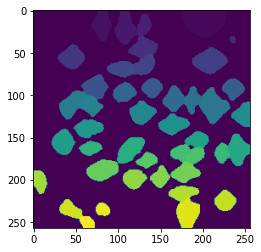

In [34]:
cell_rw = random_walker(cell_imageArray,mask)
plt.imshow(cell_rw)

In [35]:
import cv2

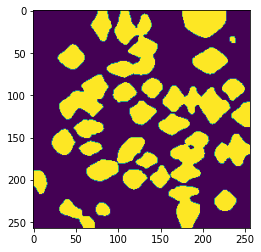

In [36]:
cell_rw_thresh = np.where(cell_rw!=1,1,0)
plt.imshow(cell_rw_thresh)
plt.show()
contours, hierarchy = cv2.findContours(cv2.convertScaleAbs(cell_rw_thresh), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

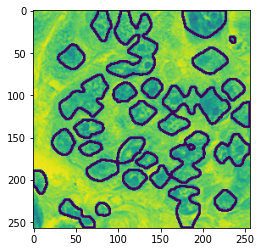

In [48]:
img = cell_imageArray.copy()
cv2.drawContours(img, contours,-1,(0,0,255), 2)
plt.imshow(img)
plt.show()

In [38]:
# use connected component decomposition from the previous assignment for generating seeds for individual cells
ccd_cell = ccd(cell_objectMask,1,)
# implement a function for segmentation of 2D arrays

# implement a visualization for cell borders


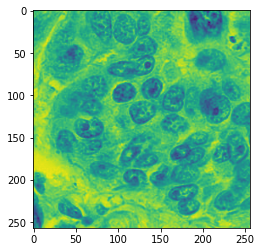

In [39]:
plt.imshow(cell_imageArray)

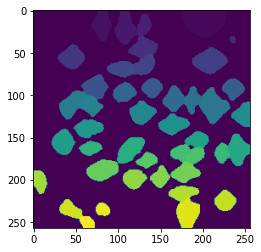

In [40]:
plt.imshow(cell_rw)

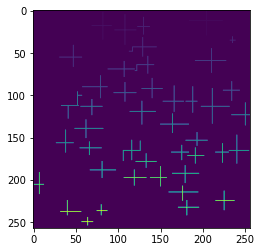

In [41]:
plt.imshow(ccd_cell)

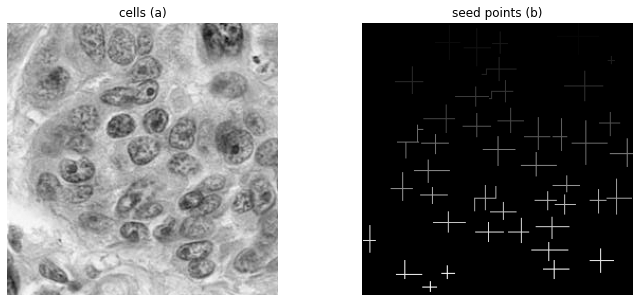

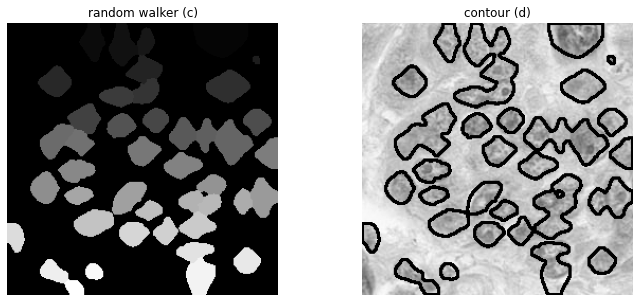

In [49]:

fig, ax = ig, axes = plt.subplots(ncols=2, figsize=(18,5))
ax = axes.ravel()

ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)

ax[0].imshow(cell_imageArray, cmap=plt.cm.gray)
ax[0].set_title('cells (a)')
ax[0].axis('off')

ax[1].imshow(ccd_cell, cmap=plt.cm.gray)
ax[1].set_title('seed points (b)')
ax[1].axis('off')
plt.show()

fig, ax = ig, axes = plt.subplots(ncols=2, figsize=(18,5))
ax = axes.ravel()

ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)

ax[0].imshow(cell_rw, cmap=plt.cm.gray)
ax[0].set_title('random walker (c)')
ax[0].axis('off')

ax[1].imshow(img, cmap=plt.cm.gray)
ax[1].set_title('contour (d)')
ax[1].axis('off')
plt.show()



# Random walker in 3D

Exercise 1.3. Implement the random walker algorithm for the segmentation of mandible from 3D HaN CT images. The input is the CT image and binary seed masks of mandible and background. In contrast to cell segmentation, there is only one target object in this assignment. The segmentation should be performed in 3D and not by separating the 3D image into 2D slices. The segmentation may take a very long time if the wrong parameters are selected. Be sure to specify beta = 10000 and mode = 'cg_mg' when you call the random walker algorithm from skimage.

Exercise 1.4. Visualize the mandible segmentation results for z-slices of 10, 50, 55, and 60. Please check how the reference segmentation mask is visualized at the beginning of the exercise.

In [43]:
# implement a function for segmentation of 3D arrays
HaN_rw = random_walker(HaN_imageArray,HaN_objectMask,beta=10000,mode='cg_mg')
# implement a visualization for mandible borders

c:\Users\tobia\AppData\Local\Programs\Python\Python39\lib\site-packages\skimage\segmentation\random_walker_segmentation.py:496: UserWarning: "cg_mg" not available, it requires pyamg to be installed. The "cg_j" mode will be used instead.
  X = _solve_linear_system(lap_sparse, B, tol, mode)
